# **Import Libraries and modules**

In [0]:
# https://keras.io/
# !pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# importing all the required libraries
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, Concatenate, Reshape
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
# loading the mnist data from the mnist library which is part of keras.dataset modules in the train and test format
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


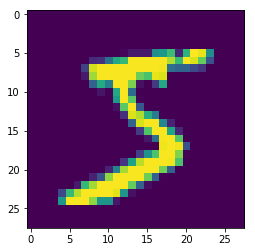

In [0]:
# visualizing one sample of the dataset
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
# adding one more dimension to the dataset which is the number of channel. Because these are all grey images, so total number of channel is one.
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Normalising the grey values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# checking the format in which the output data is stored
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# how do the labels look after converting them to categorical form
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

different trial architectures

In [0]:
# from keras.layers import Activation
# model = Sequential()

 
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 26))
# model.add(Flatten())
# model.add(Activation('softmax'))

In [0]:
# from keras.layers import Activation
# model = Sequential()
# model.add(Convolution2D(128, 3, activation='relu', input_shape=(28,28,1))) #(26,26,16)
# model.add(Convolution2D(16, 3, activation='relu')) #(24,24,32)
# model.add(MaxPooling2D(pool_size=(2, 2))) #(12,12,32)
# model.add(Convolution2D(16, 3, activation='relu')) #(10,10,32)
# model.add(MaxPooling2D(pool_size=(2, 2))) #(5,5,32)
# model.add(Convolution2D(8, 3, activation='relu')) #(3, 3, 32)
# model.add(Convolution2D(10, 3, activation='relu')) #(1, 1, 32)
# model.add(Flatten()) # output shape = 10
# model.add(Activation('softmax'))

# model.summary()

In [0]:
# from keras.layers import Activation
# model = Sequential()
# model.add(Convolution2D(128, 3, activation='relu', input_shape=(28,28,1))) #26
# model.add(Convolution2D(64, 3, activation='relu', name = 'papa')) #24
# model.add(Convolution2D(32, 3, activation='relu')) #22
# model.add(MaxPooling2D(pool_size=(2, 2))) #11
# model.add(Convolution2D(128, 3, activation='relu')) #9
# model.add(Convolution2D(64, 3, activation='relu')) #7
# model.add(Convolution2D(32, 3, activation='relu')) #5
# model.add(Convolution2D(16, 3, activation='relu')) #3
# model.add(Convolution2D(10, 3, activation='relu')) #1
# model.add(Flatten()) # output shape = 10
# model.add(Activation('softmax'))

# model.summary()

In [0]:
# from keras.layers import Activation
# model = Sequential()

# model.add(Convolution2D(8, 3, activation='relu', input_shape=(28,28,1)))  # output shape = (26, 26, 8)
# model.add(Convolution2D(16, 3, activation='relu'))  # output shape = (24, 24, 16)
# model.add(Convolution2D(32, 3, activation='relu')) # output shape = (22, 22, 32)
# model.add(MaxPooling2D(pool_size=(2, 2))) # output shape = (11, 11, 32)
# model.add(Convolution2D(16, 3, activation='relu')) # output shape = (9, , 9, 16)
# model.add(Convolution2D(32, 3, activation='relu')) # output shape = (7, 7, 32)
# model.add(MaxPooling2D(pool_size=(2, 2))) # output shape = (3, 3, 32)
# model.add(Convolution2D(10, 3, activation='relu')) # output shape = (1, 1, 10)
# model.add(Flatten()) # output shape = 10
# model.add(Activation('softmax'))

# model.summary()





In [0]:
# from keras.layers import Activation, Input, Dense
# from keras.models import Model
# inp = Input(shape = (28,28,1))
# model = Convolution2D(32, 3, activation='relu')(inp) #26 26 32
# x = Convolution2D(8, 3, activation='relu', name = 'papa')(model)#24 24 8
# model = Convolution2D(8, 3, activation='relu')(x)#22 22 8
# model = MaxPooling2D(pool_size=(2, 2))(model) #11 11 8
# model = Convolution2D(8, 3, activation='relu')(model)#9 9 8
# model = Convolution2D(8, 3, activation='relu')(model)#7 7 8
# model = Flatten()(model)
# x_flat = Flatten()(x)
# model = Concatenate()([model,x_flat])
# model = Reshape((25,25,8))(model) #25 25 8
# model = Convolution2D(32,4, activation='relu')(model) #22 22 32
# model = Convolution2D(16,3, activation='relu')(model) #20 20 4
# model = Convolution2D(8,3, activation='relu')(model) #18 18 4
# model = MaxPooling2D(pool_size=(2, 2))(model) #9 9 4
# model = Convolution2D(16,3, activation='relu')(model) #7 7 4
# model = Convolution2D(8,3, activation='relu')(model) #5 5 4
# model = Convolution2D(8,3, activation='relu')(model) #3 3 4
# # model = Convolution2D(10,3, activation='relu')(model) #1 1 10
# model = Flatten()(model)
# # model = Dense(20,activation='elu')(model)
# model = Dense(10,activation='softmax')(model)

# model = Model(inputs=[inp], outputs = [model])

# model.summary()

In [0]:

# from keras.layers import Activation, Input, Dense
# from keras.models import Model
# inp = Input(shape = (28,28,1))
# model = Convolution2D(32, 3, activation='relu')(inp) #26 26 32
# x = Convolution2D(4, 3, activation='relu', name = 'papa')(model)#24 24 4
# model = Convolution2D(4, 3, activation='relu')(x)#22 22 4
# model = MaxPooling2D(pool_size=(2, 2))(model) #11 11 4
# model = Convolution2D(4, 3, activation='relu')(model)#9 9 4
# model = Convolution2D(4, 3, activation='relu')(model)#7 7 4
# model = Flatten()(model)
# x_flat = Flatten()(x)
# model = Concatenate()([model,x_flat])
# model = Reshape((25,25,4))(model) #25 25 4
# model = Convolution2D(4,4, activation='relu')(model) #22 22 4
# model = Convolution2D(4,3, activation='relu')(model) #20 20 4
# model = Convolution2D(4,3, activation='relu')(model) #18 18 4
# model = MaxPooling2D(pool_size=(2, 2))(model) #9 9 4
# model = Convolution2D(4,3, activation='relu')(model) #7 7 4
# model = Convolution2D(4,3, activation='relu')(model) #5 5 4
# model = Convolution2D(4,3, activation='relu')(model) #3 3 4
# # model = Convolution2D(10,3, activation='relu')(model) #1 1 10
# model = Flatten()(model)
# model = Dense(10,activation='softmax')(model)
# # model = Activation('softmax')(model)









# # x = Convolution2D(16, 3, activation='relu')(model)
# # model = MaxPooling2D(pool_size=(2, 2))(x)
# # model = Convolution2D(8, 3, activation='relu')(model)
# # model = Convolution2D(2, 3, activation='relu')(model)
# # model = Flatten()(model)
# # x_flat = Flatten()(x)
# # model = Concatenate()([model,x_flat])
# # # outp = Flatten()(model)
# # outp = Dense(10,activation='softmax')(model)
# # # model = Activation('softmax')(outp)
# model = Model(inputs=[inp], outputs = [model])
# # model.add(Convolution2D(128, 3, activation='relu', input_shape=(28,28,1))) #26
# # model.add(Convolution2D(64, 3, activation='relu', name = 'papa')) #24
# # model.add(MaxPooling2D(pool_size=(2, 2))) #12
# # model.add(Convolution2D(64, 3, activation='relu')) #10
# # model.add(MaxPooling2D(pool_size=(2, 2))) #5
# # model.add(Convolution2D(16, 3, activation='relu')) #3
# # model.add(Convolution2D(10, 3, activation='relu')) #1
# # model.add(Concatenate())
# # model.add(Flatten()) # output shape = 10
# # model.add(Activation('softmax'))

# model.summary()

In [0]:
# #psycode pscyched

# from keras.layers import Activation, Input, Dense
# from keras.models import Model
# inp = Input(shape = (28,28,1))
# model = Convolution2D(32, 3, activation='relu', name = 'papa')(inp)
# model = Convolution2D(16, 3, activation='relu')(model)
# model = MaxPooling2D(pool_size=(2, 2))(model)
# x = Convolution2D(16, 3, activation='relu')(model)
# model = MaxPooling2D(pool_size=(2, 2))(x)
# model = Convolution2D(8, 3, activation='relu')(model)
# model = Convolution2D(2, 3, activation='relu')(model)
# model = Flatten()(model)
# x_flat = Flatten()(x)
# model = Concatenate()([model,x_flat])
# # outp = Flatten()(model)
# outp = Dense(10,activation='softmax')(model)
# # model = Activation('softmax')(outp)
# model = Model(inputs=[inp], outputs = [outp])
# # model.add(Convolution2D(128, 3, activation='relu', input_shape=(28,28,1))) #26
# # model.add(Convolution2D(64, 3, activation='relu', name = 'papa')) #24
# # model.add(MaxPooling2D(pool_size=(2, 2))) #12
# # model.add(Convolution2D(64, 3, activation='relu')) #10
# # model.add(MaxPooling2D(pool_size=(2, 2))) #5
# # model.add(Convolution2D(16, 3, activation='relu')) #3
# # model.add(Convolution2D(10, 3, activation='relu')) #1
# # model.add(Concatenate())
# # model.add(Flatten()) # output shape = 10
# # model.add(Activation('softmax'))

# model.summary()

In [0]:
# from keras.layers import Activation
# model = Sequential()
# model.add(Convolution2D(16, 3, activation='relu', input_shape=(28,28,1))) #26
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
# model.add(Convolution2D(32, 3, activation='relu', name = 'papa')) #24
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
# model.add(MaxPooling2D(pool_size=(2, 2))) #12
# model.add(Convolution2D(16, 3, activation='relu')) #10
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
# model.add(Convolution2D(16, 3, activation='relu')) #8
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
# model.add(Convolution2D(32, 3, activation='relu')) #6
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
# model.add(MaxPooling2D(pool_size=(2, 2))) #3
# model.add(Convolution2D(10, 3, activation='relu')) #1
# model.add(BatchNormalization())
# model.add(Flatten()) # output shape = 10
# model.add(Activation('softmax'))

# model.summary()

### Insights about the architecture of the model for getting the required minimum accuracy of 99.40%, using the number of parameters which is less than 20,000



1.   How to decide the number of channels for the first few layers after the image input. First tried with a smaller values like 64 for the first layer and let's say 128 for the second layere. The intution was, the first layer will extract the information about the edges and gradients. After that once we have info about the edges and gradients those information will be used to get the info about the textures in the next layers. Now if we have used 64 channels to get the edges, that means we have 64 different edges so using that we will have more number of textures. So we need more number of channels in next layer. So based on this intution I have given more channels to the next layer which is 128. But contrary to my intution it was giving accruacy lower than the architecure where there are more number channels in the first layer and lesser number of channels in the next layer  (☉_☉). 

> #### Disclaimer! whatever understanding about the channels we got in the paragraph above is wrong. The accuracy was coming low because of some colab issues. When I tried same thing multiple number of times, I realised that having more number of channels for coming layers is actually better to get good accracy. 



2.  Next is to decide on how many max-pool layers to use. Usually the convention is we should use maxpool after few layers of input based on the size of the image. If the image size is big we can use max-pool sometimes after 9,11 or 13 layers of convolution. Or if it is small we should use after lesser layers. Another obligation is the max-pool layer should be away from the output. Cause if we do convolution on already small dimensional image after convolutions there won't be enough information left to get desired output. So keeping all those points in mind, the confusion here is how many max-pooling layers we should use here? So, we tried both the options with keeeping the other parameters constant. Obviously when there are two max-pooling the number of parameters will be low, but we tried to keep the number of channels in same range. After trying both the approaches, found out that one max-pooling layer after 3 layers of convolution was giving the best result.

In [0]:
# final model architecture which gives the desired accuracy after trying multiple combinations of network architecture

model = Sequential()
model.add(Convolution2D(14, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(16, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(24, 3, activation='relu')) #22
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2))) #11
model.add(Convolution2D(12, 3, activation='relu')) #9
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(16, 3, activation='relu')) #7
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(20, 3, activation='relu')) #5
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(24, 3, activation='relu')) #3
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(10, 3, activation='relu')) #1
model.add(BatchNormalization())
model.add(Flatten()) # output shape = 10
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_189 (Conv2D)          (None, 26, 26, 14)        140       
_________________________________________________________________
batch_normalization_217 (Bat (None, 26, 26, 14)        56        
_________________________________________________________________
dropout_175 (Dropout)        (None, 26, 26, 14)        0         
_________________________________________________________________
papa (Conv2D)                (None, 24, 24, 16)        2032      
_________________________________________________________________
batch_normalization_218 (Bat (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_176 (Dropout)        (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_190 (Conv2D)          (None, 22, 22, 24)        3480      
__________

In [0]:
# compiling the model with the specific loss function and optimizer

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# running the training for 30 epochs

model.fit(X_train, Y_train, batch_size=32, epochs=30, verbose=1)

Epoch 1/30
60000/60000 [==============================] - 33s 542us/step - loss: 0.6004 - acc: 0.8437
Epoch 2/30
60000/60000 [==============================] - 26s 426us/step - loss: 0.2254 - acc: 0.9436
Epoch 3/30
60000/60000 [==============================] - 26s 427us/step - loss: 0.1522 - acc: 0.9628
Epoch 4/30
60000/60000 [==============================] - 26s 426us/step - loss: 0.1177 - acc: 0.9708
Epoch 5/30
60000/60000 [==============================] - 26s 433us/step - loss: 0.1020 - acc: 0.9743
Epoch 6/30
60000/60000 [==============================] - 25s 425us/step - loss: 0.0873 - acc: 0.9775
Epoch 7/30
60000/60000 [==============================] - 25s 422us/step - loss: 0.0826 - acc: 0.9782
Epoch 8/30
60000/60000 [==============================] - 25s 421us/step - loss: 0.0753 - acc: 0.9800
Epoch 9/30
60000/60000 [==============================] - 25s 423us/step - loss: 0.0718 - acc: 0.9808
Epoch 10/30
60000/60000 [==============================] - 25s 424us/step - loss: 

In [0]:
# evaluating the model on test data

score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.019979015947552397, 0.9947]


In [0]:
# predicting the outputs using the trained model

y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[7.37971095e-06 1.60320633e-05 2.74687354e-05 4.88048317e-06
  1.39672447e-05 3.53481187e-06 2.08981655e-05 9.99864817e-01
  2.46313743e-06 3.85489548e-05]
 [4.00262834e-05 1.63817400e-04 9.99481857e-01 2.84741964e-05
  1.53543515e-05 1.29189248e-05 1.91686384e-04 1.93592859e-05
  2.84521011e-05 1.80666229e-05]
 [6.25547636e-06 9.99973774e-01 7.99242173e-07 1.77031453e-07
  2.22988024e-06 7.27442796e-07 1.17016168e-06 1.34803076e-05
  8.77338834e-07 5.49623905e-07]
 [9.99836087e-01 5.60172921e-05 6.19063167e-06 4.94153619e-06
  3.57571457e-06 1.04456985e-05 3.57906647e-05 1.86313846e-05
  7.34507421e-06 2.10170238e-05]
 [2.58151135e-06 6.39495047e-05 2.60547540e-06 1.71587965e-06
  9.99668717e-01 1.74582544e-06 1.77877553e-06 6.74790726e-06
  3.84493342e-06 2.46211886e-04]
 [4.36741038e-06 9.99978900e-01 7.09223627e-07 8.30521643e-08
  1.83827603e-06 2.07309782e-07 7.28928512e-07 1.10569117e-05
  1.61367996e-06 4.41760108e-07]
 [8.92002936e-06 8.85034751e-05 9.00283339e-06 5.92896731e

In [0]:
# storing each layers of the network in a dictionary format

layer_dict = dict([(layer.name, layer) for layer in model.layers])

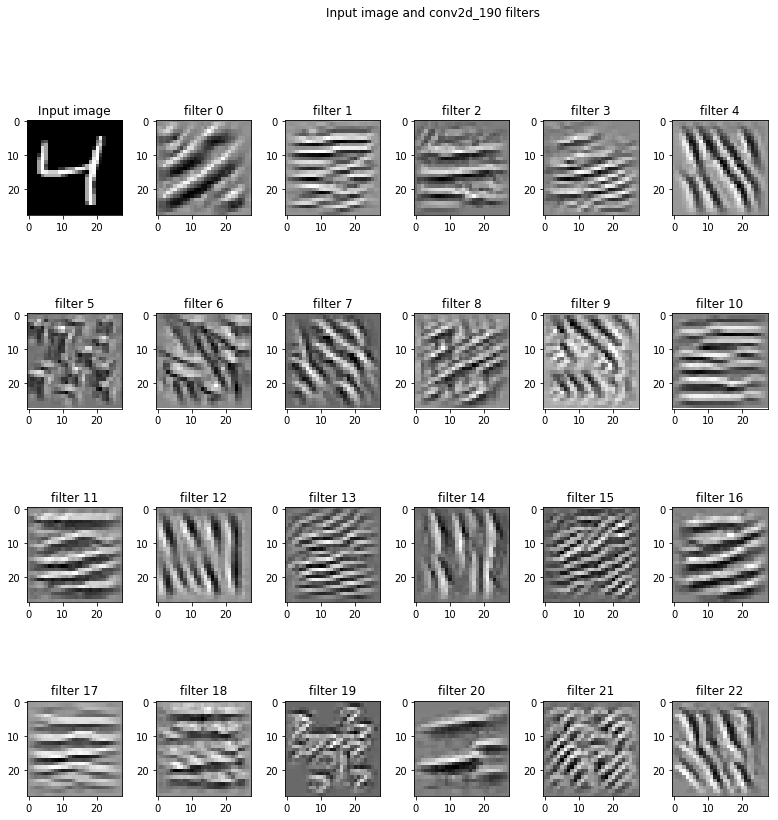

In [0]:
# this block of code is to show how the receptive field looks like form a particular layer or else we can say it as a visualization of the pixels for which the kernels gets activated the most

import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_190'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()